Extract the dataset from kaggle using kaggle APi

In [1]:
import kaggle
! kaggle datasets download -d shariful07/student-mental-health

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0




  0%|          | 0.00/1.62k [00:00<?, ?B/s]
100%|██████████| 1.62k/1.62k [00:00<00:00, 790kB/s]


In [2]:
import zipfile as zp
ref = zp.ZipFile('student-mental-health.zip')
ref.extractall()
ref.close()

### Import the necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Explore and understand the  data

In [4]:
df = pd.read_csv("Student Mental health.csv", index_col= None)
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [9]:
df.dtypes

Timestamp          object
Gender             object
Age               float64
Course name        object
Current Year       object
CGPA               object
Marital status     object
Depression         object
Anxiety            object
attack             object
treatment          object
dtype: object

### Rename the columns

In [8]:
df.rename(columns={'Choose your gender' : 'Gender',
                   'What is your course?' : 'Course name',
                   'Your current year of Study' : 'Current Year',
                   'What is your CGPA?' : 'CGPA',
                   'Do you have Depression?' : 'Depression',
                   'Do you have Anxiety?' : 'Anxiety',
                   'Do you have Panic attack?' : 'attack',
                   'Did you seek any specialist for a treatment?' : 'treatment'
}, inplace= True)

### data cleaning
1. handling null values
2. delete unwamted columns
3. modifing the columns


In [11]:
df.isnull().sum()

Timestamp         0
Gender            0
Age               1
Course name       0
Current Year      0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
attack            0
treatment         0
dtype: int64

In [12]:
df

,Timestamp,Gender,Age,Course name,Current Year,CGPA,Marital status,Depression,Anxiety,attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [18]:
df['Age'] = df['Age'].fillna(0).astype(int)


In [29]:
df.drop(columns='Timestamp', inplace=True)

In [41]:
for col in df:
    uniq = df[col].unique()
    print(uniq)

['Female' 'Male']
[18 21 19 22 23 20 24]
['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
['year 1' 'year 2' 'year 3' 'year 4']
['Grade B' 'Grade A' 'Grade C' 'Grade D' 'Fail']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [32]:
 df = df[df['Age'] != 0]

In [35]:
df['CGPA'] = df['CGPA'].str.strip()

In [38]:
df['CGPA'].replace(
    {
        '3.50 - 4.00' : 'Grade A',
        '3.00 - 3.49' : 'Grade B',
        '2.50 - 2.99' : 'Grade C',
        '2.00 - 2.49' : 'Grade D',
        '0 - 1.99' : 'Fail'
    },
inplace= True
)

In [40]:
df['Current Year'] = df['Current Year'].str.lower()

## Data Visualization


### Distribution of gender

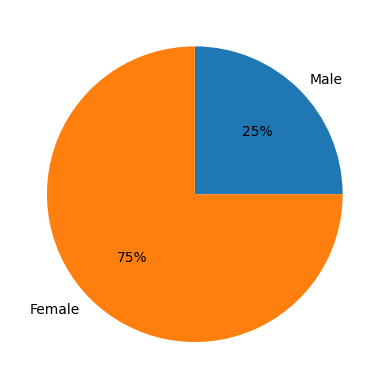

In [55]:
male = df.loc[df['Gender'] == 'Male'].count()[0]
female = df.loc[df['Gender'] == 'Female'].count()[0]

plt.pie([male, female], labels= ['Male', 'Female'], autopct= '%.f%%')
plt.show()

In [51]:
df.loc[df['Gender'] == 'Male'].count()[0]

25

### Distribution of depression by Age

<Axes: xlabel='Age', ylabel='count'>

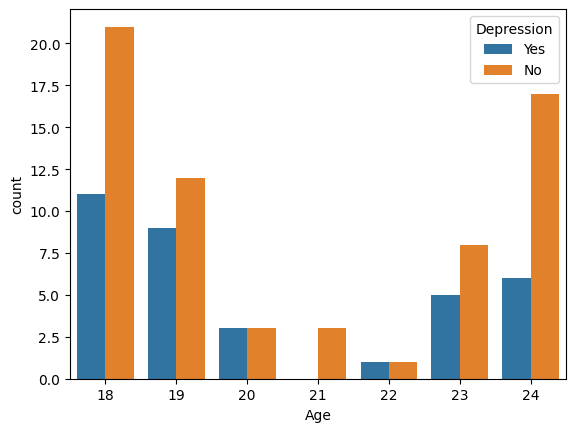

In [60]:
sns.countplot(data = df, x = 'Age' , hue = 'Depression')

### Distribution of depression by gender

<Axes: xlabel='Gender', ylabel='count'>

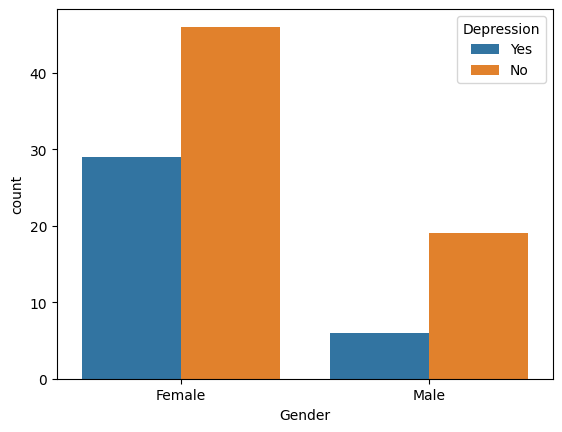

In [61]:
sns.countplot(data = df, x = 'Gender' , hue = 'Depression')

### Distribution of anziety by Gender

<Axes: xlabel='Gender', ylabel='count'>

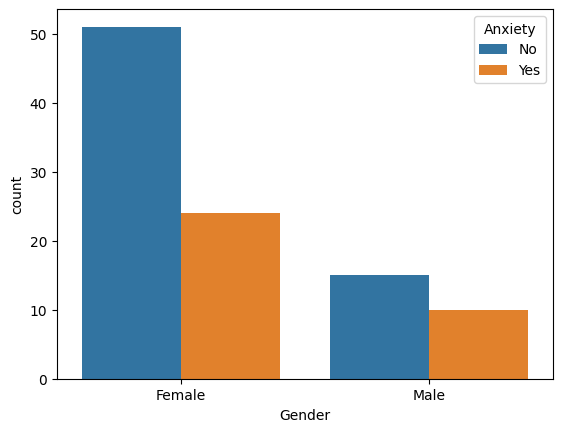

In [63]:
sns.countplot(data = df, x = 'Gender' , hue = 'Anxiety')

In [64]:
df.rename(columns={'attack' : 'Panic attack'}, inplace= True)

### Distribution of panic attack by gender

<Axes: xlabel='Gender', ylabel='count'>

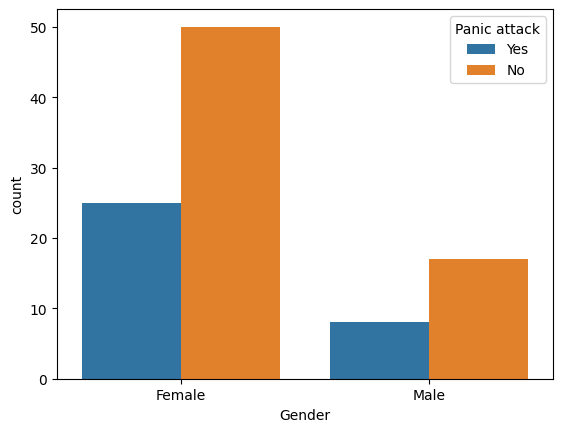

In [65]:
sns.countplot(data = df, x = 'Gender' , hue = 'Panic attack')

### Distribution of mental health treatment by gender

<Axes: xlabel='Gender', ylabel='count'>

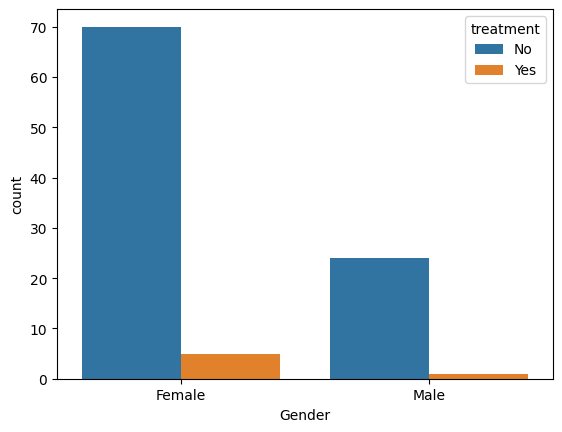

In [72]:
sns.countplot(data = df, x = 'Gender' , hue = 'treatment')

### Distribution of depression by course name

<Axes: xlabel='count', ylabel='Course name'>

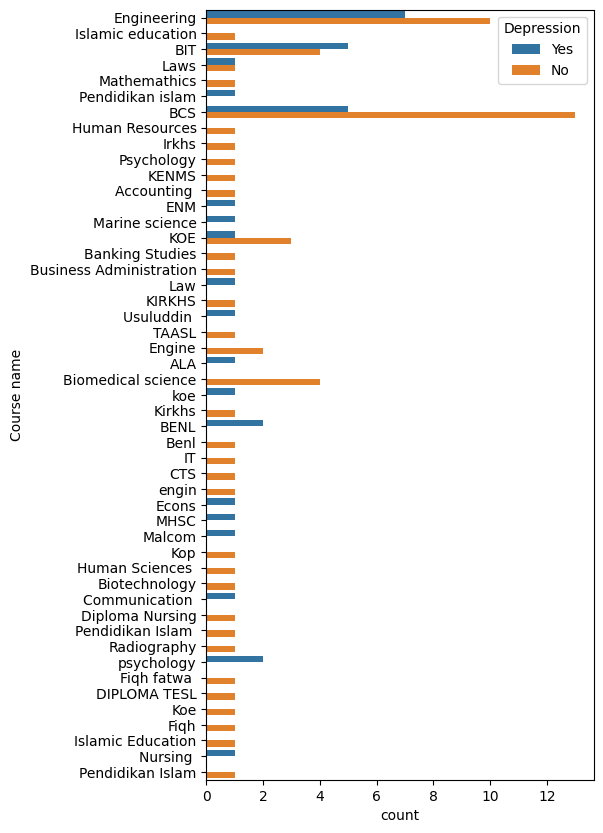

In [85]:
plt.figure(figsize=(5,10))
sns.countplot(data = df, y = 'Course name', hue = 'Depression' )